In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import scipy.stats
from scipy.interpolate  import interp1d
plt.rcParams['figure.dpi'] = 100

c:\Users\zu21202\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


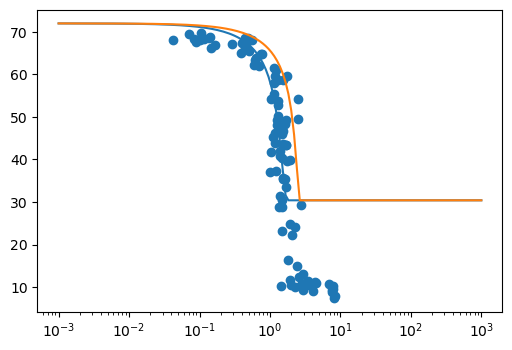

In [72]:
#import simulation points
#f = r'C:\Users\zu21202\OneDrive - University of Bristol\Documents\Python\droplet-simulation-data\alvarez-monoloayer-compare\NaCl\C16E8-NaCl-6-9'
f = r'C:\Users\zu21202\OneDrive - University of Bristol\Documents\Python\droplet-simulation-data\ionics\SDS_Sea-Spray_st_out'
f2 = r'C:\Users\zu21202\OneDrive - University of Bristol\Documents\Python\droplet-simulation-data\ionics\Ionic_con'
data = pd.read_csv(f+'.csv').T
data_con=pd.read_csv(f2+'.csv').T
con = data_con.iloc[1]
st_max= data.iloc[1]# r = 6 microns
st_min= data.iloc[2]# r = 9 microns

interp_min=interp1d(con,st_min) # interpolate min surface tension 
interp_max=interp1d(con,st_max) # interpolate max surface tension 

## droplet measurements as experimental dataset
f=r'C:\Users\zu21202\OneDrive - University of Bristol\Documents\UoB-PostDoc\Ionic Surfactant Paper\Filtered_Droplet_Data\ST-Sea-Spray-SDS' 
data2 = pd.read_csv(f+'.txt',index_col=None, sep='\s').T

d_con=data2.iloc[4]
d_st=data2.iloc[1]

## Macroscopic measurements as experimental dataset
# f=r'C:\Users\zu21202\OneDrive - University of Bristol\Documents\UoB-PostDoc\K100 data/NaCl-C16E8-new' 
# data2 = pd.read_csv(f+'.csv',index_col=None).T
# d_con=data2.iloc[1]
# d_st=data2.iloc[2]*1000

plt.scatter(d_con,d_st)
plt.plot(con,st_min)
plt.plot(con,st_max)
plt.xscale('log')
#plt.yscale('log')

c:\Users\zu21202\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


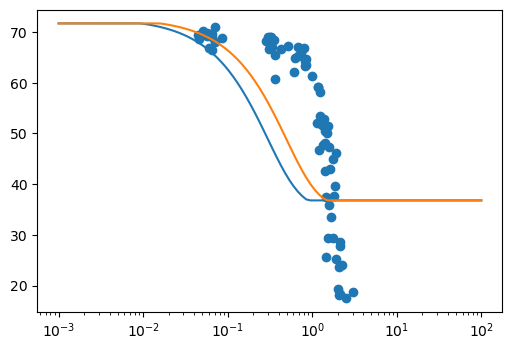

In [42]:
#import simulation points
f = r'C:\Users\zu21202\OneDrive - University of Bristol\Documents\UoB-PostDoc\Ionic Surfactant Paper\rad 6 - 10 290623 run\CSVs\CTAB-NaCl'
data = pd.read_csv(f+'.csv').T
con = data.iloc[0]
st_max= data.iloc[1]# r = 6 microns
st_min= data.iloc[2]# r = 9 microns

interp_min=interp1d(con,st_min) # interpolate min surface tension 
interp_max=interp1d(con,st_max) # interpolate max surface tension 

## droplet measurements as experimental dataset
f=r'C:\Users\zu21202\OneDrive - University of Bristol\Documents\UoB-PostDoc\Ionic Surfactant Paper\Filtered_Droplet_Data/ST-NaCl-CTAB' 
data2 = pd.read_csv(f+'.txt',index_col=None, sep='\s').T

d_con=data2.iloc[4]
d_st=data2.iloc[1]

## Macroscopic measurements as experimental dataset
# f=r'C:\Users\zu21202\OneDrive - University of Bristol\Documents\UoB-PostDoc\K100 data/NaCl-C16E8-new' 
# data2 = pd.read_csv(f+'.csv',index_col=None).T
# d_con=data2.iloc[1]
# d_st=data2.iloc[2]*1000

plt.scatter(d_con,d_st)
plt.plot(con,st_min)
plt.plot(con,st_max)
plt.xscale('log')

RMSE= 6.514307457038977
SSE= 3.063939395326123


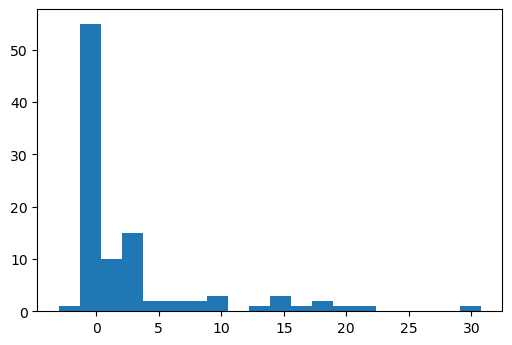

In [75]:
cmc=2.237211147

i=0
residuals=[]
while i < len(d_con):
    if d_con[i] < min(con):
        c_1=min(con)
    elif d_con[i] > max(con):
        c_1=max(con)
    else:
        c_1=d_con[i]
    st_i=d_st[i]
    st_min_1=interp_min(c_1)
    st_max_1=interp_max(c_1)
    #print(st_min_1,st_i,st_max_1)
    if c_1 > cmc:
        res = 0
    else:
        if st_i < st_max_1 and st_i > st_min_1: 
            res=0
        elif st_i < st_min_1:
            res=st_min_1-st_i
        elif st_i > st_max_1:
            res=st_max_1-st_i

    #print(res)
    residuals=np.append(residuals,res)
    i=i+1

plt.hist(residuals,bins=20)

r2=residuals**2
sum_r2=np.sum(r2)
norm_sum=sum_r2/(len(d_con)-1)
rmse=np.sqrt(norm_sum)
print('RMSE=',rmse)

print('SSE=',sum(abs(residuals))/len(d_con))

In [74]:
filename='residules-SDS-SS-Alvarez.csv'
df={'concnetration':d_con,
'residules':-1*residuals}
df=pd.DataFrame(df)
df.to_csv(filename)